### imports

In [1]:
import pickle
import numpy as np
import scipy
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.segmentation import watershed
from skimage import filters
import seaborn as sns
from scipy import ndimage as ndi
from skimage import *
# import seaborn as sns
# import pandas as pd

### settings

In [2]:
sns.set_style('white')
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 2}

# matplotlib.rc('font', **font)
# matplotlib.rcParams.update({'font.size': 2})

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title






### functions

In [3]:
with open('/home/yzy/bioSIMS/data/Segment_Cut/Cut_256.pickle', 'rb') as handle:
    Cut_mask_dict = pickle.load(handle)
with open('/home/yzy/bioSIMS/data/Segment_SIMS/SIMS_256_rotation.pickle', 'rb') as handle:
    SIMS_dict = pickle.load(handle)
with open('/home/yzy/bioSIMS/data/Segment_Human_256/Human_256_int.pickle', 'rb') as handle:
    Human_mask_dict = pickle.load(handle)

In [10]:
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage.filters import gaussian
def EB(test_tissue):
#     test_tissue = 'R1'
    image = SIMS_dict[test_tissue]
    image = gaussian(image)
    edges = canny(image/image.max())
    fill_cells = ndi.binary_fill_holes(edges).astype('int')
    segmented_cells, _ = ndi.label(fill_cells)
    return segmented_cells


In [12]:
EB_mask_dict = {}


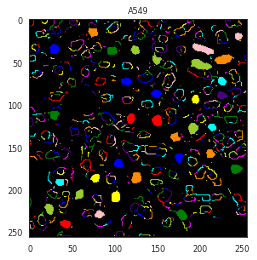

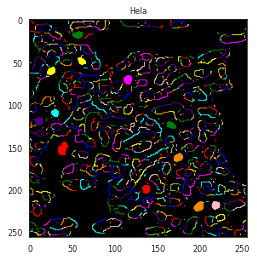

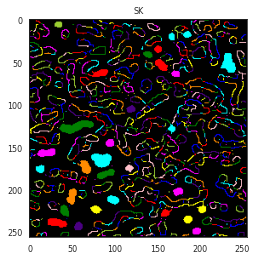

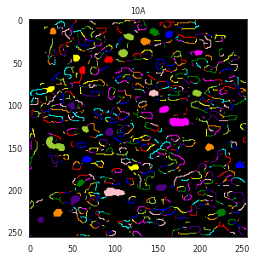

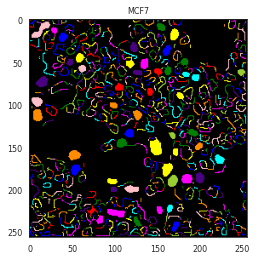

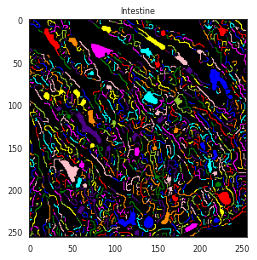

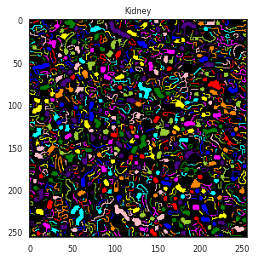

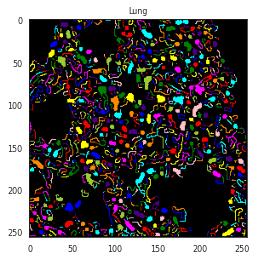

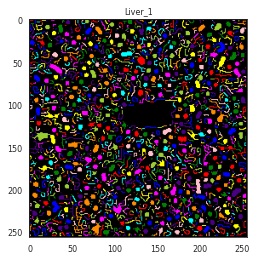

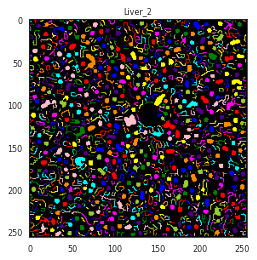

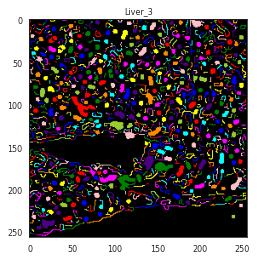

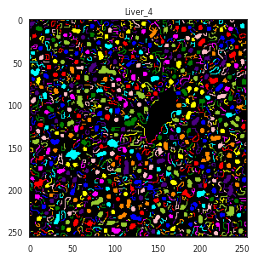

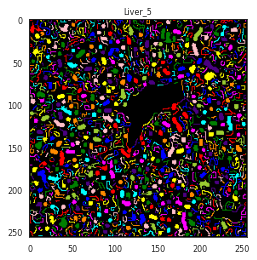

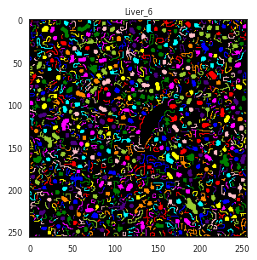

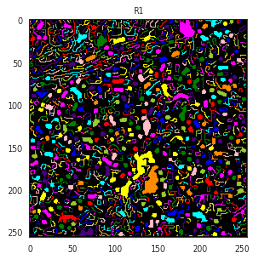

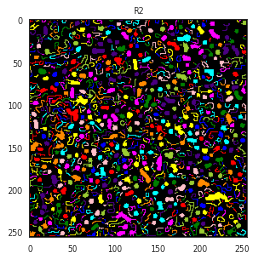

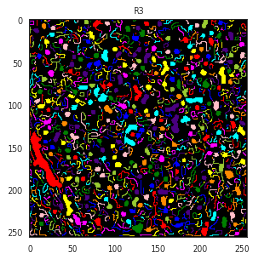

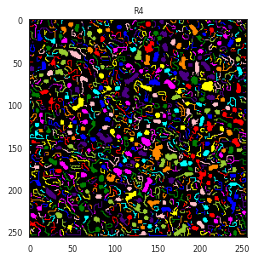

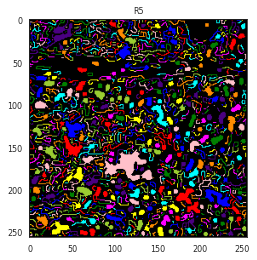

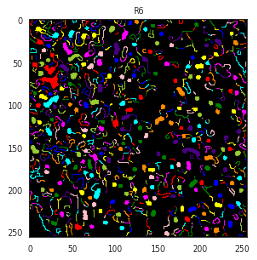

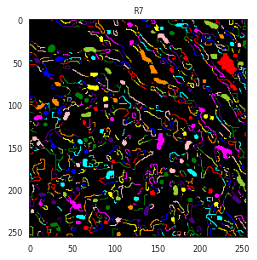

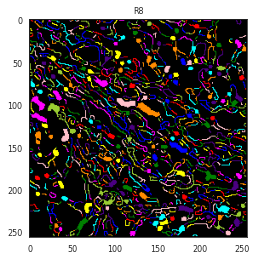

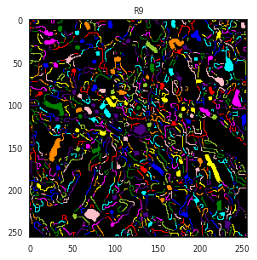

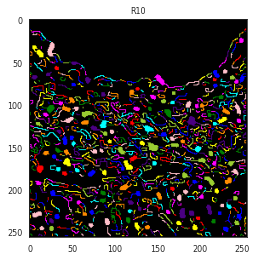

In [14]:
tissue_list = [
    'A549','Hela','SK','10A','MCF7',
    'Intestine','Kidney','Lung',
    'Liver_1','Liver_2','Liver_3','Liver_4','Liver_5','Liver_6',
    'R1','R2','R3','R4','R5','R6','R7','R8','R9','R10'
]

for test_tissue in tissue_list:
    
    
    
    img = SIMS_dict[test_tissue]
    EB_rst = EB(test_tissue)

    EB_mask_dict[test_tissue]=EB_rst


    plt.imshow(color.label2rgb(EB_rst,bg_label=0))
    plt.title('{0}'.format(test_tissue))
    plt.show()

In [16]:
with open('/home/yzy/bioSIMS/data/Segment_EB/EB_mask.pickle', 'wb') as handle:
    pickle.dump(EB_mask_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    


In [ ]:
1+1